In [125]:
import imports

In [126]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda


plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic

The giphy_magic extension is already loaded. To reload it, use:
  %reload_ext giphy_magic


In [127]:
train = pd.read_csv('assets/train_weather.csv')
test = pd.read_csv('assets/test_weather.csv')
un_test = pd.read_csv('assets/test_unspecified_species_coded_weather.csv')


In [128]:
train

,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Tavg,Sunrise,Sunset,PrecipTotal,ResultDir,AvgSpeed,RH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778


In [129]:
test

,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL","AddressNumberAndStreet_1100 S ARTESIAN AVE, Chicago, IL",...,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Tavg,Sunrise,Sunset,PrecipTotal,ResultDir,AvgSpeed,RH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4.266667,19.433333,0.00,18.0,10.2,45.833333


In [130]:
baseline = len(train[train['WnvPresent'] == 0]['WnvPresent']) / float(len(train))
1- baseline

0.053923303834808256

In [131]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation, metrics 


In [13]:
X = train.drop('WnvPresent', 1)
y = train.WnvPresent

X_train, X_test, y_train, y_test = train_test_split(X, y)

D_xgb_mat_train = xgb.DMatrix(X_train, y_train)
D_xgb_mat_test = xgb.DMatrix(X_test, y_test)
D_xgb_test = xgb.DMatrix(test)
D_xgb_untest = xgb.DMatrix(un_test)

In [107]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'roc_auc', cv = 5, n_jobs = -1) 

In [108]:
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [109]:
optimized_GBM.grid_scores_

/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83931, std: 0.02694, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.83205, std: 0.02273, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.83057, std: 0.01981, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.82822, std: 0.02762, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.82601, std: 0.02292, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.82552, std: 0.01992, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.82345, std: 0.02660, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.82433, std: 0.02578, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.82376, std: 0.02101, params: {'max_depth': 7, 'min_child_weight': 5}]

In [110]:
optimized_GBM.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [111]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'roc_auc', cv = 5, n_jobs = -1)
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [112]:
optimized_GBM.grid_scores_

/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83795, std: 0.02711, params: {'subsample': 0.7, 'learning_rate': 0.1},
 mean: 0.83931, std: 0.02694, params: {'subsample': 0.8, 'learning_rate': 0.1},
 mean: 0.84012, std: 0.02328, params: {'subsample': 0.9, 'learning_rate': 0.1},
 mean: 0.83679, std: 0.02131, params: {'subsample': 0.7, 'learning_rate': 0.01},
 mean: 0.83656, std: 0.02169, params: {'subsample': 0.8, 'learning_rate': 0.01},
 mean: 0.83635, std: 0.02122, params: {'subsample': 0.9, 'learning_rate': 0.01}]

In [113]:
optimized_GBM.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [180]:
our_params = {'eta': 0.1, 'silent':0, 'subsample': 0.9, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1,
             'learning_rate':0.1} 

# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = D_xgb_mat_train, num_boost_round = 3000, nfold = 5, 
                metrics = ['auc'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [181]:
cv_xgb.tail()
# esr = 1000; nbr = 1125

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
315,0.840695,0.016077,0.921064,0.004116
316,0.840739,0.016091,0.921150,0.004104
317,0.840760,0.016121,0.921191,0.004075
318,0.840752,0.016004,0.921265,0.004054
319,0.841028,0.015971,0.921399,0.004024


In [182]:
final_gb = xgb.train(our_params, D_xgb_mat_train, num_boost_round = 20)

In [183]:
#Predict training set:
X_test_predprob = final_gb.predict(D_xgb_mat_test)

In [184]:
print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, X_test_predprob)

AUC Score (Test): 0.827025


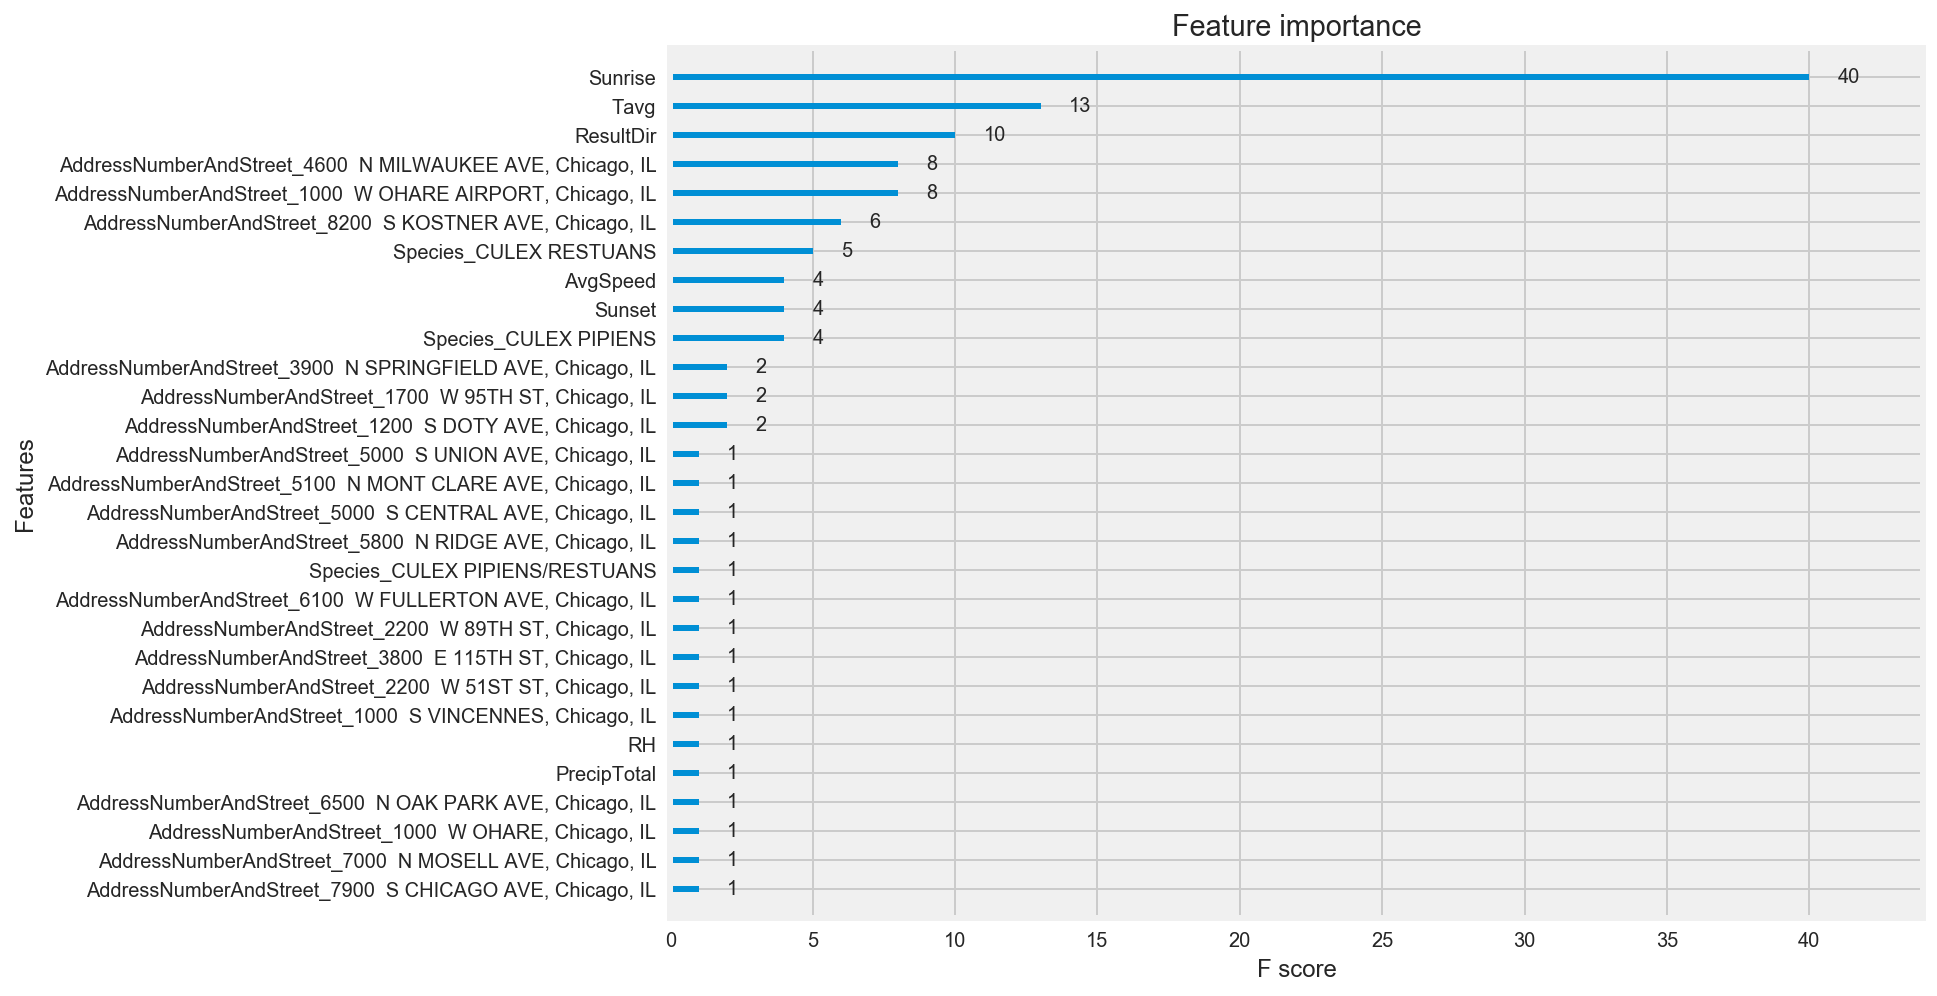

In [185]:
rcParams['figure.figsize'] = 10, 8
xgb.plot_importance(final_gb)


In [186]:
importances = final_gb.get_fscore()
importances

{'AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL': 1,
 'AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL': 8,
 'AddressNumberAndStreet_1000  W OHARE, Chicago, IL': 1,
 'AddressNumberAndStreet_1200  S DOTY AVE, Chicago, IL': 2,
 'AddressNumberAndStreet_1700  W 95TH ST, Chicago, IL': 2,
 'AddressNumberAndStreet_2200  W 51ST ST, Chicago, IL': 1,
 'AddressNumberAndStreet_2200  W 89TH ST, Chicago, IL': 1,
 'AddressNumberAndStreet_3800  E 115TH ST, Chicago, IL': 1,
 'AddressNumberAndStreet_3900  N SPRINGFIELD AVE, Chicago, IL': 2,
 'AddressNumberAndStreet_4600  N MILWAUKEE AVE, Chicago, IL': 8,
 'AddressNumberAndStreet_5000  S CENTRAL AVE, Chicago, IL': 1,
 'AddressNumberAndStreet_5000  S UNION AVE, Chicago, IL': 1,
 'AddressNumberAndStreet_5100  N MONT CLARE AVE, Chicago, IL': 1,
 'AddressNumberAndStreet_5800  N RIDGE AVE, Chicago, IL': 1,
 'AddressNumberAndStreet_6100  W FULLERTON AVE, Chicago, IL': 1,
 'AddressNumberAndStreet_6500  N OAK PARK AVE, Chicago, IL': 1,
 'Addres

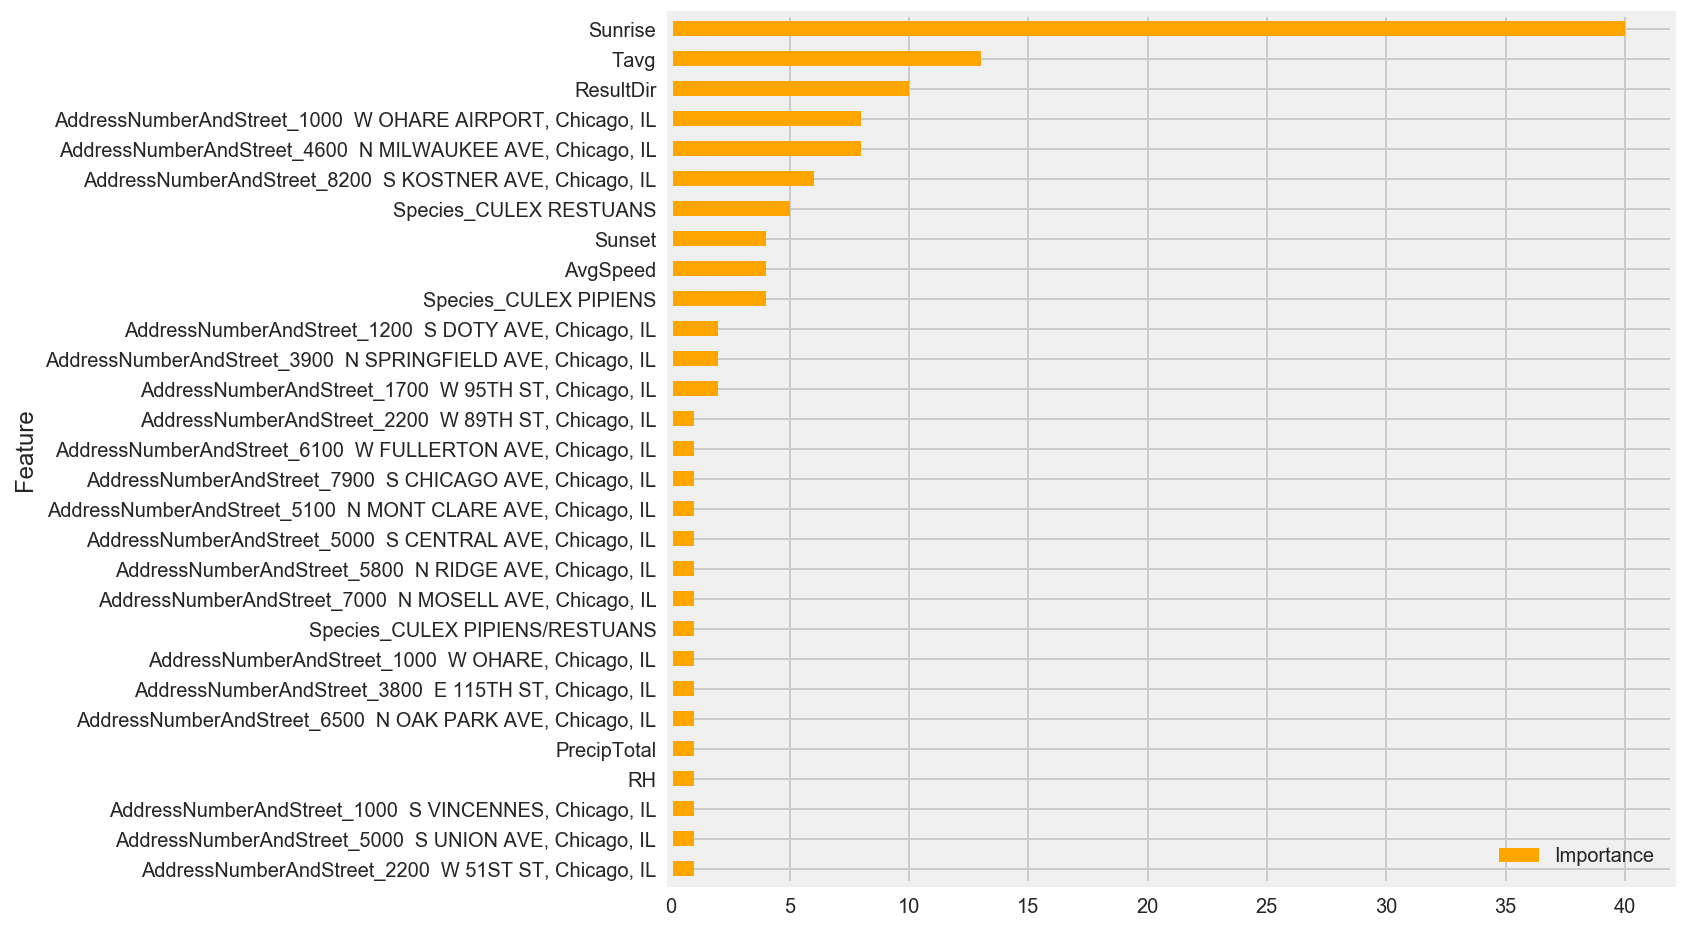

In [187]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [188]:
#Predict training set:
X_test_predprob = final_gb.predict(D_xgb_test)
print X_test_predprob

[ 0.07326084  0.07141049  0.07448377 ...,  0.08221869  0.08221869
  0.08221869]


In [123]:
predictions = final_gb.predict(D_xgb_test)

sample = pd.DataFrame(predictions, columns=['WnvPresent'])
sample['Id'] = (sample.index + 1)

sample.to_csv('AUC_Grid_num_beat_the_benchmark_unbalanced_XGB.csv', index=False)

In [124]:
sample

,WnvPresent,Id
0,0.002511,1
1,0.001296,2
2,0.001821,3
3,0.001215,4
4,0.000773,5
5,0.001295,6
6,0.001295,7
7,0.001295,8
8,0.000539,9
9,0.000342,10


In [190]:
param_test = { 
    'max_depth':range(3,10,1),
    'min_child_weight':range(1,12,1),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample': [i/100.0 for i in range(60,100,5)],
    'colsample_bytree':[i/100.0 for i in range(60,110,5)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 1e-5, 1e-2, 0.1, 1, 100]
}

In [191]:

# grid = GridSearchCV(xgb, param_test, cv=5, n_jobs=-1)
# grid.fit(X_train, y_train)

# best_xgb = grid.best_estimator_
# print best_xgb

In [192]:


#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]
X_test_predprob = best_xgb.predict_proba(X_test)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, X_test_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

NameError: name 'best_xgb' is not defined

In [193]:
predictions = best_xgb.predict_proba(un_test)

sample = pd.DataFrame(predictions[:,1], columns=['WnvPresent'])
sample['Id'] = (sample.index + 1)

sample.to_csv('Big_gri_beat_the_benchmark_unbalanced_XGB.csv', index=False)

NameError: name 'best_xgb' is not defined

In [194]:
sample

,WnvPresent,Id
0,0.002511,1
1,0.001296,2
2,0.001821,3
3,0.001215,4
4,0.000773,5
5,0.001295,6
6,0.001295,7
7,0.001295,8
8,0.000539,9
9,0.000342,10


In [195]:
wnv = train[train['WnvPresent'] == 0]
w1nv = train[train['WnvPresent'] == 1]

In [196]:
wnv

,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Tavg,Sunrise,Sunset,PrecipTotal,ResultDir,AvgSpeed,RH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.5,4.350000,19.283333,0.000,17.0,6.95,52.777778


In [197]:
print 'total', len(train)
print 'No wnv', len(wnv)
print 'wnv', len(w1nv)

total 8475
No wnv 8018
wnv 457


In [198]:
import random

print len(wnv.ix[random.sample(wnv.index, 914)])

print len(wnv)

914
8018


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
wnv = wnv.ix[random.sample(wnv.index, 914)]

In [200]:
balance = pd.concat([wnv, w1nv])

In [201]:
balance


,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Tavg,Sunrise,Sunset,PrecipTotal,ResultDir,AvgSpeed,RH
7024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,71.0,4.450000,19.466667,0.0000,8.0,5.10,51.388889
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80.0,5.683333,17.766667,0.0000,19.0,11.20,51.388889
7462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,71.5,4.750000,19.183333,0.0000,29.5,7.45,55.555556
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,76.5,4.983333,18.900000,0.5300,6.5,6.45,76.388889
5355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,81.5,4.633333,19.300000,0.0050,33.5,6.30,58.333333
2155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,56.5,5.466667,18.150000,0.0000,4.0,5.80,61.111111
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,63.5,4.316667,19.516667,0.0000,2.0,8.25,77.777778
4201,0,0,0,0,0,0,0,0,1,0,...,0,0,0,64.5,5.200000,18.583333,1.0700,7.5,10.35,88.888889
783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80.5,4.750000,19.183333,0.0000,11.0,3.90,50.000000
2968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,63.0,4.283333,19.383333,0.0000,25.5,6.95,45.833333


In [202]:
baseline = len(balance[balance['WnvPresent'] == 0]['WnvPresent']) / float(len(balance))
baseline

0.6666666666666666

In [203]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation, metrics 
from xgboost import XGBClassifier

In [204]:
X = balance.drop('WnvPresent', 1)
y = balance.WnvPresent

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


Model Report
Accuracy : 0.8395
AUC Score (Train): 0.920816
AUC Score (Test): 0.816152


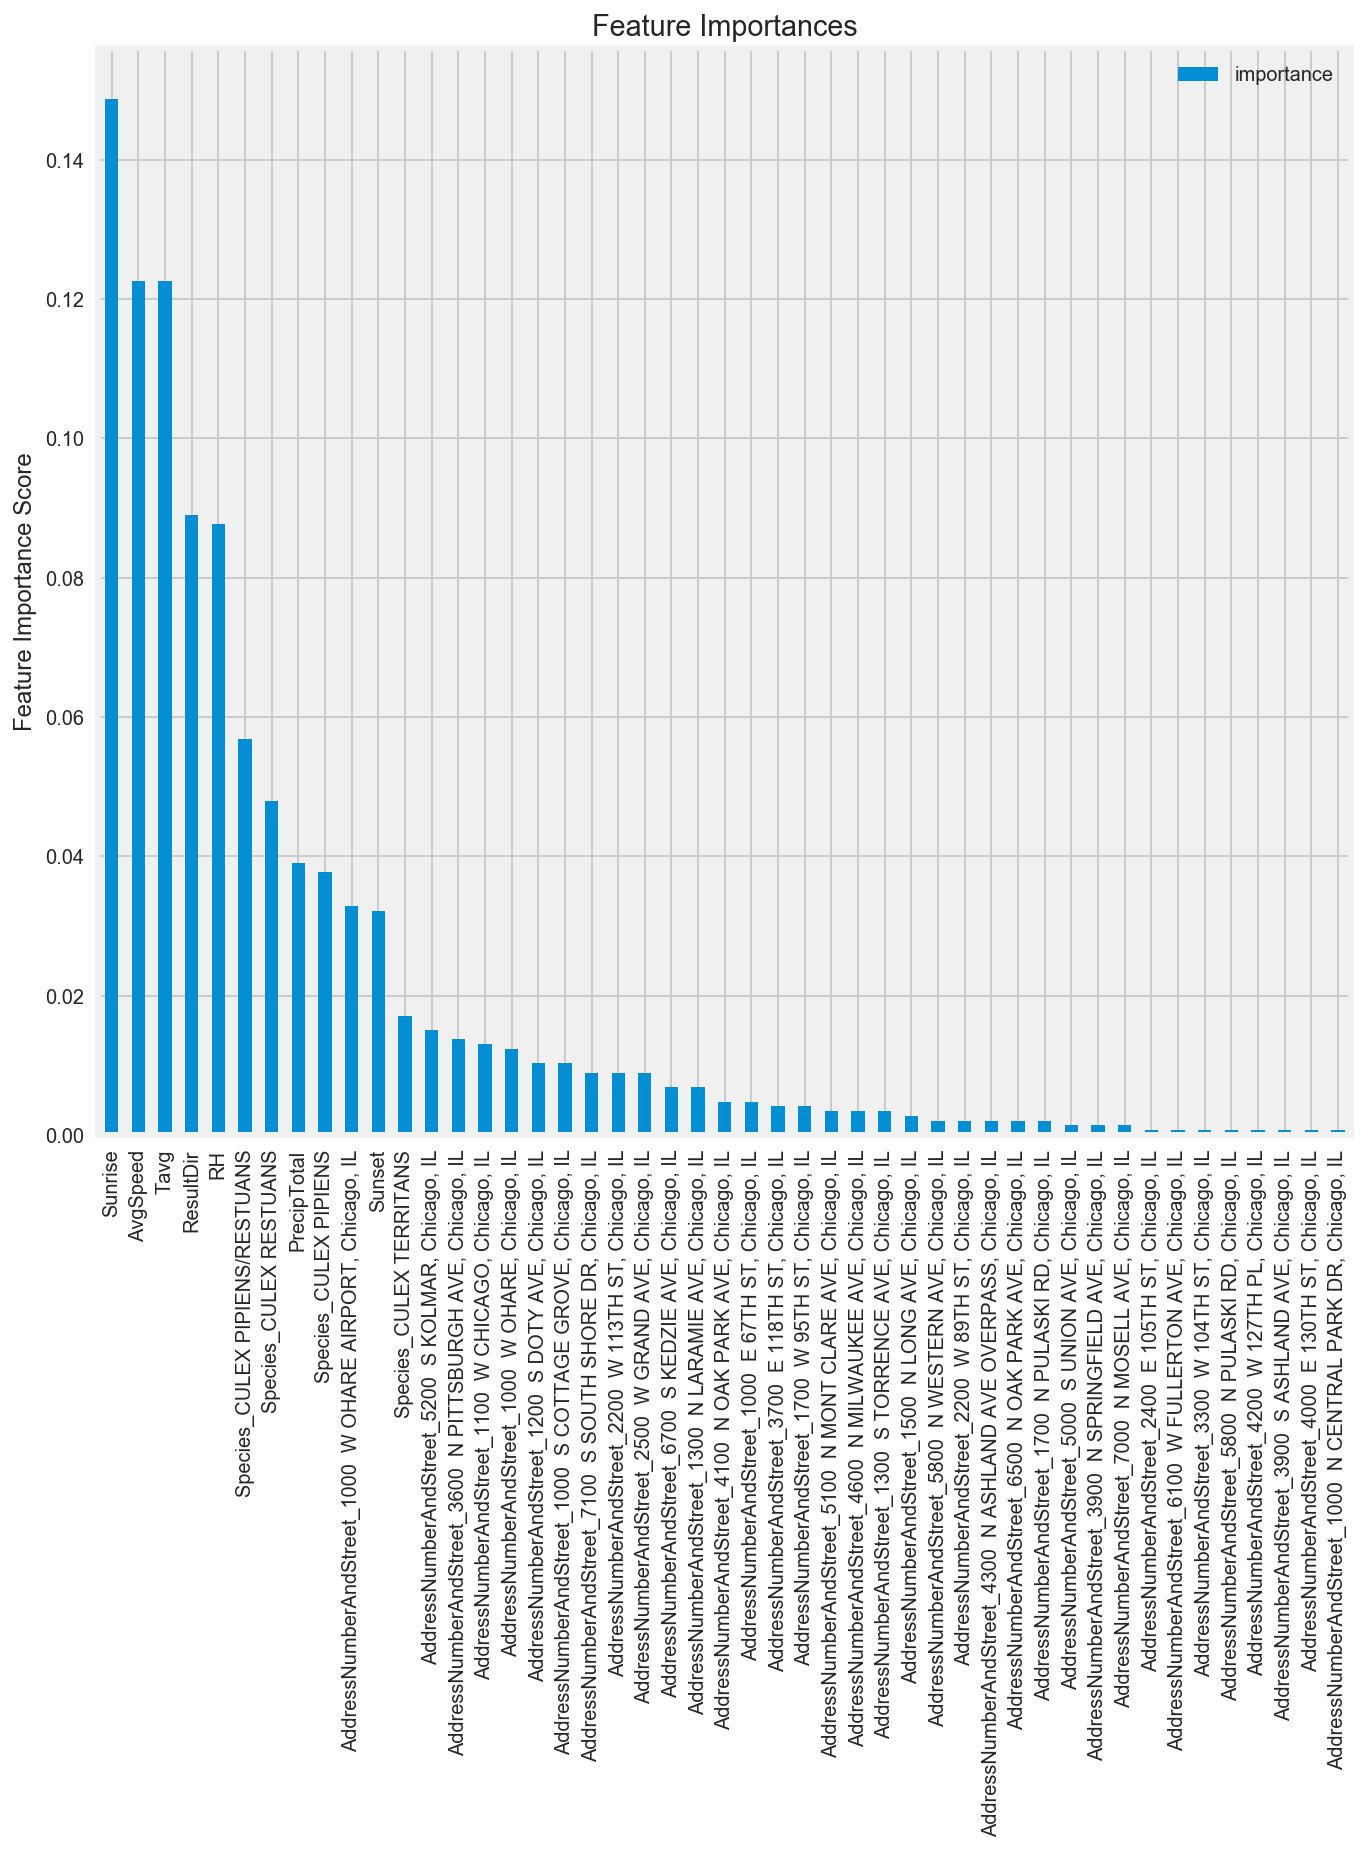

In [206]:
best_xgb = XGBClassifier(base_score=0.334, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.045, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:logistic', random_state=0,
       reg_alpha = 0.000005, reg_lambda=0.2, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)


best_xgb.fit(X_train, y_train)

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]
X_test_predprob = best_xgb.predict_proba(X_test)[:,1]


rcParams['figure.figsize'] = 10, 10

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, X_test_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [207]:
predictions = best_xgb.predict_proba(test)

sample = pd.DataFrame(predictions[:,1], columns=['WnvPresent'])
sample['Id'] = (sample.index + 1)

sample.to_csv('beat_the_benchmark_all_XGB.csv', index=False)

In [208]:
sample

,WnvPresent,Id
0,0.034375,1
1,0.024293,2
2,0.028408,3
3,0.028408,4
4,0.023252,5
5,0.028408,6
6,0.028408,7
7,0.028408,8
8,0.031079,9
9,0.023090,10


In [209]:
sample[sample.WnvPresent >1]

,WnvPresent,Id


In [210]:
nn = balance.reset_index()

In [211]:
nn = nn.drop('index', 1)

In [212]:
nn

,WnvPresent,"AddressNumberAndStreet_1000 E 67TH ST, Chicago, IL","AddressNumberAndStreet_1000 N CENTRAL PARK DR, Chicago, IL","AddressNumberAndStreet_1000 S CALIFORNIA AVE, Chicago, IL","AddressNumberAndStreet_1000 S COTTAGE GROVE, Chicago, IL","AddressNumberAndStreet_1000 S STONY ISLAND AVE, Chicago, IL","AddressNumberAndStreet_1000 S VINCENNES, Chicago, IL","AddressNumberAndStreet_1000 W 95TH ST, Chicago, IL","AddressNumberAndStreet_1000 W OHARE AIRPORT, Chicago, IL","AddressNumberAndStreet_1000 W OHARE, Chicago, IL",...,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Tavg,Sunrise,Sunset,PrecipTotal,ResultDir,AvgSpeed,RH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,71.0,4.450000,19.466667,0.0000,8.0,5.10,51.388889
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80.0,5.683333,17.766667,0.0000,19.0,11.20,51.388889
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,71.5,4.750000,19.183333,0.0000,29.5,7.45,55.555556
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,76.5,4.983333,18.900000,0.5300,6.5,6.45,76.388889
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,81.5,4.633333,19.300000,0.0050,33.5,6.30,58.333333
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,56.5,5.466667,18.150000,0.0000,4.0,5.80,61.111111
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,63.5,4.316667,19.516667,0.0000,2.0,8.25,77.777778
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,64.5,5.200000,18.583333,1.0700,7.5,10.35,88.888889
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80.5,4.750000,19.183333,0.0000,11.0,3.90,50.000000
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,63.0,4.283333,19.383333,0.0000,25.5,6.95,45.833333


In [213]:
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [29]:
X_nn = train.drop('WnvPresent', 1).values
y_nn = train.WnvPresent.values

In [31]:
scaler = StandardScaler()

In [32]:
X_nn = scaler.fit_transform(X_nn)
y_nn = np_utils.to_categorical(y_nn)

In [33]:
X_np_train, X_np_test, y_np_train, y_np_test = train_test_split(X_nn, y_nn)

In [34]:
input_dim = X_np_train.shape[1]

In [40]:
def build_nn(input_dim):
    model = Sequential()
    model.add(Dense(300, input_dim=input_dim,kernel_initializer='normal', activation='relu'))

    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Fold #:  1
Building model...
Training model...
Evaluating model...
  32/2119 [..............................] - ETA: 0s[0.36509414608051255, 0.93204341676225078]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 300)               45900     
_________________________________________________________________
dense_91 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 602       
Total params: 136,802
Trainable params: 136,802
Non-trainable params: 0
_________________________________________________________________
None
ROC:  0.812109178876
Continued Avg:  0.812109178876
Fold #:  2
Building model...
Training model...
Evaluating model...
  32/2119 [..............................] - ETA: 0s[0.46030096069206444, 0.92638036815441682]
___________________

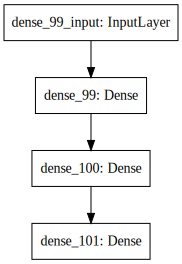

In [388]:
from sklearn.model_selection import KFold

num_folds = 4
av_roc = 0.
count = 0

kf = KFold(n_splits=num_folds, random_state=41, shuffle=True)
for train_index, test_index in kf.split(X_nn):
    
    count += 1
    print 'Fold #: ', count
    
    X_np_train, X_np_test = X_nn[train_index], X_nn[test_index]
    y_np_train, y_np_test = y_nn[train_index], y_nn[test_index]
    
    input_dim = X_np_train.shape[1]
    
    print("Building model...")
    model = build_nn(input_dim)
    
    print("Training model...")
    model.fit(X_np_train, y_np_train, epochs=15, batch_size=30, verbose=0)
    
    
    print("Evaluating model...")
    test_preds = model.predict_proba(X_np_test, verbose=0)
    roc = metrics.roc_auc_score(y_np_test, test_preds)
    
    scores = model.evaluate(X_np_test, y_np_test)
    print scores
    
    print model.summary()
    
    
    print 'ROC: ', roc
    av_roc += roc
    print 'Continued Avg: ', av_roc/count

    
print('Average ROC:', av_roc/num_folds)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
test = scaler.fit_transform(test)
test_preds_fin = model.predict_proba(test, verbose=0)

In [46]:
sample_nn = pd.DataFrame(test_preds_fin[:,1], columns=['WnvPresent'])
sample_nn['Id'] = (sample.index + 1)

sample.to_csv('TEST_mbgood_beat_the_benchmark_all_NN.csv', index=False)

In [47]:
sample_nn

,WnvPresent,Id
0,5.181647e-04,1
1,9.690773e-10,2
2,1.460010e-10,3
3,2.168867e-10,4
4,4.976595e-11,5
5,5.739693e-08,6
6,1.005085e-06,7
7,4.990000e-07,8
8,2.233197e-07,9
9,2.123161e-09,10


In [67]:
combine = (sample_nn.WnvPresent + sample.WnvPresent)/2

In [71]:
sample_combo = pd.DataFrame(combine, columns=['WnvPresent'])
sample_combo['Id'] = (sample.index + 1)

sample_combo.to_csv('beat_the_benchmark_all_NN_and_XGB_Old_is_73.csv', index=False)

In [72]:
sample_combo

,WnvPresent,Id
0,0.006119,1
1,0.004913,2
2,0.004391,3
3,0.004447,4
4,0.004761,5
5,0.005206,6
6,0.005207,7
7,0.005207,8
8,0.005267,9
9,0.004420,10


In [384]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

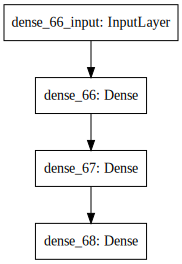

In [385]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))